# Data Scraping
## Research of the market for vacancies of analysts and data scientists

### Step 1. Problem statement.
Describe the problem that your project is addressing, define the objective. Specify the requirements for the data. Provide explanations as to why the chosen source of data is suitable for this task.


I plan to develop myself and look for a job in the field of data analysis. The best way to determine the needs of the job market (skills, number of vacancies) is to analyze vacancies.

The largest Russian-language job site was chosen as the data source - hh.ru. This data source allows us to get information about all aspects of the vacancy:
- the required experience (without experience, with experience), 
- the work format (remote, office); 
- working hours (full, abbreviated); 
- the employer's city;
- company rating;
- skills.



Thus, the goal of the project is to study the job market in the field of data science.

### Step 2. Gather a dataset that you would find interesting to investigate.

##### Import required libraries:

In [1]:
import pandas as pd

from vacancy_func import get_all_vacancies, get_vacancy_info
from vacancy_func import str_to_list, str_to_date, categorize_vacancy, skills_rating, get_and_save_data, download_data
from vacancy_func import plot_vacancies, plot_exp, plot_work_format, plot_map, plot_skills

To get information about all vacancies of interest:
1. Get links to all vacancies.
2. Get information from the pages of all vacancies.
3. Save the received information as a csv file.

The **get_all_vacancies()** function bypasses all pages depending on the search query and generates a dataframe containing the unique identifier.

Сreate a list of vacancies of interest - **vacancies**.

Select the experience required in vacancies and run the function and write its result to a variable - **vacancies_df**.

In [14]:
experience = ['noExperience', 'between1And3', 'between3And6', 'moreThan6']
vacancies = [
        'BI Developer', 'Data Analyst', 'Data Engineer', 'Data Science', 'Data Scientist',
        'Web Analyst', 'BI analyst', 'Product analyst', 'Продуктовый аналитик',  
        'Аналитик данных', 'Веб-аналитик', 'Инженер данных','Дата инженер'
    ]

vacancies_df = get_all_vacancies(vacancies, exp=experience[3], page=0, search_period=1)

current page = 0


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:75: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 75 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(data)


The **get_vacancy_info()** function uses the dataframe obtained in the **get_all_vacancies()** function to bypass all vacancies and form a dataframe containing the following information:
- vacancy id;
- vacancy name;
- necessary experience;
- type of work;
- busyness;
- employer's city;
- сompany name;
- company rating;
- list of required skills;
- date of publication of the vacancy;
- link to the vacancy.

Сreate a dataframe with information about vacancies.

In [15]:
df_info = get_vacancy_info(list(vacancies_df['id']))

c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(


Vacancy № 0


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Save the received dataframe to a csv file.

In [7]:
with open('lead_23-06-2024', 'w') as f:
    f.write(df_info.to_csv())

### Step 3. Data Preprocessing.
Analyze the columns. What do they contain? Are there any missing values and where? 
Handle missing values. If most of the values in a column are missing, you can delete it. Process the missing values themselves: decide whether to delete them or not, fill them with the median/mean, or something else. Write why you chose a particular option.  
Optional. Remove duplicates (if any). Define appropriate way of handling categorical features (one-hot-encoding, label encoding or other strategy).  

Form a common dataframe from the received data.

In [2]:
df_junior = pd.read_csv(open('junior_14-06-2024'))
df_middle = pd.read_csv(open('middle_14-06-2024'))
df_senior = pd.read_csv(open('senior_14-06-2024'))
df_lead = pd.read_csv(open('lead_14-06-2024'))
frames = [df_junior, df_middle, df_senior, df_lead]
result = pd.concat(frames)

Let's check what our dataframe contains.

In [3]:
result.head(5)

,Unnamed: 0,id,vacancy_name,experience,work_type,busyness,city,company,rating,skills,pub_date,url
0,0,98893222,Менеджер проектов/Project manager/Проектный ме...,не требуется,Полная занятость,полный день,Нижний Новгород,ИП Пахомова Любовь Валерьевна,NaN,"['Грамотная речь', 'Управление интернет-проект...",10 июня 2024,https://hh.ru/vacancy/98893222
1,0,94057495,BI аналитик,не требуется,Полная занятость,полный день,Санкт-Петербург,СПб ГКУ Центр Архивных Документов,NaN,"['SQL', 'BI платформа', 'MS Excel']",15 июня 2024,https://hh.ru/vacancy/94057495
2,1,101932879,Data Engineer/Дата инженер (стажер),не требуется,Стажировка,удаленная работа,Сочи,Aston,"4,7","['SQL', 'NoSQL', 'Python', 'Базы данных', 'Big...",14 июня 2024,https://hh.ru/vacancy/101932879
3,2,101932672,Data Engineer/Дата инженер (стажер),не требуется,Стажировка,удаленная работа,Ростов-на-Дону,Aston,"4,7","['SQL', 'NoSQL', 'Python', 'Базы данных', 'Big...",14 июня 2024,https://hh.ru/vacancy/101932672
4,3,101992523,Помощник руководителя / Аналитик данных,не требуется,Полная занятость,полный день,Нижний Новгород,RepairMyApple.ru (ООО ЮНИКАЛ),"4,4","['Работа в команде', 'Грамотная речь', 'Работа...",15 июня 2024,https://hh.ru/vacancy/101992523


Our dataframe contains next columns:
- id - vacancy ID;
- vacancy_name - the name of the vacancy on the website;
- experience - the required experience of a job candidate;
- work_type - type of work - full-time, part-time, internship;
- busyness - type of employment - full-time, shift work, remote work, flexible schedule;
- city - name of the city;
- company - company location;
- rating - rating of the company;
- skills - required skills of the candidate;
- pub_date - date of placement of the vacancy on the website;
- url - the link of the job page;
- Unnamed: 0 - unnecessary column.

Delete the unnecessary column 'Unnamed: 0'.

In [4]:
result = result.drop(columns=['Unnamed: 0'])

Hange the data type in the rating column to 'float' and replace the comma to dot.

In [5]:
result['rating'] = result['rating'].str.replace(',', '.')
result = result.astype({'rating': float})

As we can see, some vacancies don't specify the required skills. 

We could replace these empty values with the most in-demand skills in a particular field (DE, DA, DS, etc.), but for further analysis, it would be better don't take into account empty values when analyzing the necessary skills, but to take into account other data from these vacancies when analyzing other parameters.

Therefore, we replace these empty values with None.

In [6]:
result.loc[result['skills'] == '[]', 'skills'] = None

Also, some companies don't have feedback from employees, as a result of which their 'rating' is defined as a NaN value. We will leave these values in the form of NaN, since we can't assign any rating to the company. 


Difference between None and NaN in Pandas: 
- None represents a missing entry, but its type is not numeric.
- NaN, which stands for not-a-number, is a numeric type. 

Column skills contains string object instead of lists. We also see that the pub_date column is represented in the string format "day full month name year", which is inconvenient for further analysis. 

Let's use function **str_to_list()** which change str object to list object and function **str_to_date()** that converts strings with a date in the datetime format - 'day-month-year'. 

In [7]:
result['skills'] = result['skills'].apply(lambda x: str_to_list(x))

result['pub_date'] = result['pub_date'].apply(lambda x: str_to_date(x))
result['pub_date'] = pd.to_datetime(result['pub_date'])  

Let's look at the resulting dataset. 

In [8]:
result.head(3)

,id,vacancy_name,experience,work_type,busyness,city,company,rating,skills,pub_date,url
0,98893222,Менеджер проектов/Project manager/Проектный ме...,не требуется,Полная занятость,полный день,Нижний Новгород,ИП Пахомова Любовь Валерьевна,NaN,"[Грамотная речь, Управление интернет-проектами...",2024-06-10,https://hh.ru/vacancy/98893222
1,94057495,BI аналитик,не требуется,Полная занятость,полный день,Санкт-Петербург,СПб ГКУ Центр Архивных Документов,NaN,"[SQL, BI платформа, MS Excel]",2024-06-15,https://hh.ru/vacancy/94057495
2,101932879,Data Engineer/Дата инженер (стажер),не требуется,Стажировка,удаленная работа,Сочи,Aston,4.7,"[SQL, NoSQL, Python, Базы данных, Big Data, Da...",2024-06-14,https://hh.ru/vacancy/101932879


In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4264 entries, 0 to 160
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            4264 non-null   int64         
 1   vacancy_name  4264 non-null   object        
 2   experience    4264 non-null   object        
 3   work_type     4264 non-null   object        
 4   busyness      4264 non-null   object        
 5   city          4263 non-null   object        
 6   company       4264 non-null   object        
 7   rating        3536 non-null   float64       
 8   skills        2766 non-null   object        
 9   pub_date      4264 non-null   datetime64[ns]
 10  url           4264 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 399.8+ KB


### Step 4. Creating New Features.
Sometimes, based on existing features, you can create new ones. For example, from a date column, you can extract: whether the day is a workday, whether the month is the end of a quarter, whether the day is a national holiday, and so on. Create features that logically fit into your dataset. The score will depend on how many features you create and how logically they fit into the research. The assistant assigns the score, and you can consult on how to do it better.

Use a function **categorize_vacancy()** that distributes all vacancies in our dataframe into several categories:
- Data Analyst
- BI Analyst
- Product Analyst
- Web Analyst
- Data Engineer
- Data Scientist
- Other

In [9]:
result['category'] = result['vacancy_name'].apply(categorize_vacancy)
result.head(5)

,id,vacancy_name,experience,work_type,busyness,city,company,rating,skills,pub_date,url,category
0,98893222,Менеджер проектов/Project manager/Проектный ме...,не требуется,Полная занятость,полный день,Нижний Новгород,ИП Пахомова Любовь Валерьевна,NaN,"[Грамотная речь, Управление интернет-проектами...",2024-06-10,https://hh.ru/vacancy/98893222,Web Analyst
1,94057495,BI аналитик,не требуется,Полная занятость,полный день,Санкт-Петербург,СПб ГКУ Центр Архивных Документов,NaN,"[SQL, BI платформа, MS Excel]",2024-06-15,https://hh.ru/vacancy/94057495,BI Analyst
2,101932879,Data Engineer/Дата инженер (стажер),не требуется,Стажировка,удаленная работа,Сочи,Aston,4.7,"[SQL, NoSQL, Python, Базы данных, Big Data, Da...",2024-06-14,https://hh.ru/vacancy/101932879,Data Engineer
3,101932672,Data Engineer/Дата инженер (стажер),не требуется,Стажировка,удаленная работа,Ростов-на-Дону,Aston,4.7,"[SQL, NoSQL, Python, Базы данных, Big Data, Da...",2024-06-14,https://hh.ru/vacancy/101932672,Data Engineer
4,101992523,Помощник руководителя / Аналитик данных,не требуется,Полная занятость,полный день,Нижний Новгород,RepairMyApple.ru (ООО ЮНИКАЛ),4.4,"[Работа в команде, Грамотная речь, Работа с бо...",2024-06-15,https://hh.ru/vacancy/101992523,Data Analyst


Let's use a function **skills_rating()** that determines the most in-demand skills in certain category.

In [10]:
top_10_DA_skills = skills_rating(df=result, specialization='Data Analyst')[:10]
top_10_DA_skills

[('SQL', 0.7),
 ('Python', 0.54),
 ('Анализ данных', 0.359),
 ('Аналитическое мышление', 0.215),
 ('Power BI', 0.2),
 ('Работа с большим объемом информации', 0.173),
 ('MS Excel', 0.173),
 ('Аналитика', 0.158),
 ('Работа с базами данных', 0.135),
 ('MS SQL', 0.118)]

New vacancies appear every day, let's use a function **get_and_save_data()** that allows us to automatically receive information about vacancies for a certain period, save it as separate .csv files.

In [11]:
experience = ['noExperience', 'between1And3', 'between3And6', 'moreThan6']
vacancies = [
        'BI Developer', 'Data Analyst', 'Data Engineer', 'Data Science', 'Data Scientist',
        'Web Analyst', 'BI analyst', 'Product analyst', 'Продуктовый аналитик',  
        'Аналитик данных', 'Веб-аналитик', 'Инженер данных','Дата инженер'
        ]

get_and_save_data(vacancies, experience, days_period=1)

Getting vacancies with experience: noExperience
current page = 0


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:75: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 75 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(data)


Getting information about vacancies with experience: noExperience


KeyboardInterrupt: 

Now let's use a function **download_data()** that allows us to download the data from different files, which was uploaded in certain date.

In [13]:
new_data = download_data()
new_data.head(10)

,id,vacancy_name,experience,work_type,busyness,city,company,rating,skills,pub_date,url
0,101984268,Ведущий Data Scientist,1–3 года,Полная занятость,полный день,Екатеринбург,Сбер для экспертов,"4,0",None,11 июня 2024,https://hh.ru/vacancy/101984268
1,101984269,Аналитик данных,1–3 года,Полная занятость,полный день,Екатеринбург,Сбер для экспертов,"4,0",None,30 мая 2024,https://hh.ru/vacancy/101984269
2,101842985,Аналитик данных IVR,1–3 года,Полная занятость,полный день,Горно-Алтайск,Сбер для экспертов,"4,0",None,11 июня 2024,https://hh.ru/vacancy/101842985
3,102334827,Аналитик данных SWR,1–3 года,Полная занятость,полный день,Адыгейск,Сбер для экспертов,"4,0",None,19 июня 2024,https://hh.ru/vacancy/102334827
4,101984240,Экономист (финансово-экономическая оценка),1–3 года,Полная занятость,полный день,Екатеринбург,Сбер для экспертов,"4,0",None,7 июня 2024,https://hh.ru/vacancy/101984240
5,100911542,Data Engineer (Дата-инженер/Инженер данных),1–3 года,Полная занятость,полный день,Омск,ООО Интернет РЕВОЛЮЦИЯ,"4,1","['Python', 'MS SQL', 'SQL', 'MySQL', 'MS SQL S...",22 июня 2024,https://hh.ru/vacancy/100911542
6,101879347,Продуктовый аналитик / Product analyst,1–3 года,Полная занятость,удаленная работа,Санкт-Петербург,ООО Софтвайс,"4,3","['SQL', 'Обучение и развитие', 'Математический...",22 июня 2024,https://hh.ru/vacancy/101879347
7,102057463,Аналитик данных,1–3 года,Полная занятость,полный день,Тольятти,АО НПФ Ростех,NaN,"['SQL', 'MS PowerPoint', 'Аналитическое мышлен...",23 июня 2024,https://hh.ru/vacancy/102057463
8,101884985,Data Engineer / Ведущий аналитик данных,1–3 года,Полная занятость,полный день,Москва,ООО Платформа Трим,NaN,"['SQL', 'Appmetrica', 'Яндекс.Метрика']",22 июня 2024,https://hh.ru/vacancy/101884985
9,102294845,Data Scientist,1–3 года,Полная занятость,полный день,Москва,ARK,"5,0",None,22 июня 2024,https://hh.ru/vacancy/102294845


### Step 5. Visualization (up to 5 points).

Your task is to create beautiful and interesting visualizations on which hypotheses can be based. The score will depend on the number of graphs, the complexity of their construction, and the interesting ideas that can be noticed from them. In addition to the graphs presented in the seminar, you can look for ideas in the matplotlib library gallery. Similarly, you can consult with the teaching assistants.

Plot for the distribution of vacancies in the labor market.

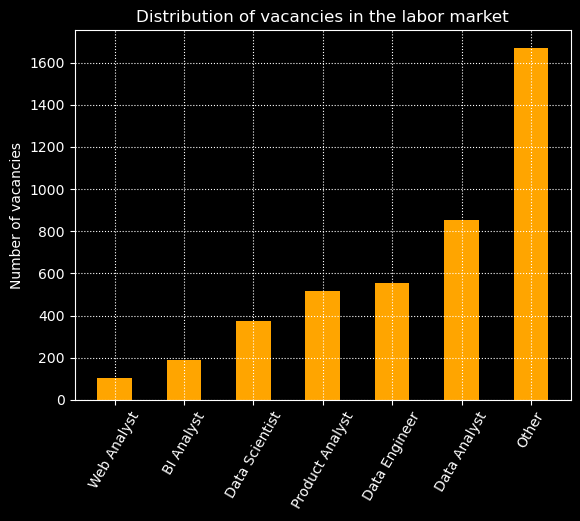

In [19]:
plot_vacancies(df=result)

Plot for the distribution of vacancies depending on experience.

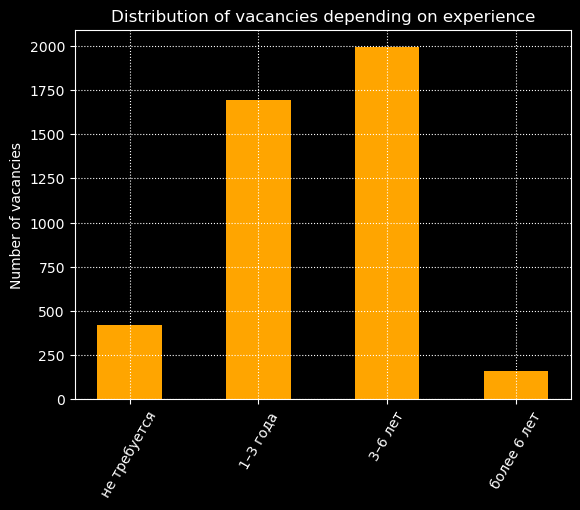

In [20]:
plot_exp(df=result)

Plot for the distribution of vacancies depending on the format of the work.

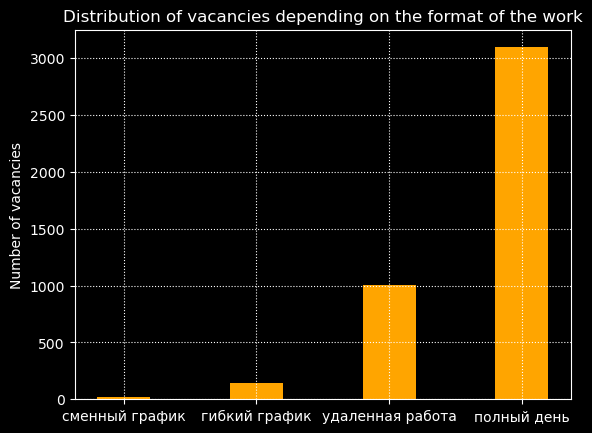

In [13]:
plot_work_format(df=result)

Build a map of the distribution of vacancies by city.

In [23]:
plot_map(df=result)

Plot graphs of the necessary skills depending on the specialty.

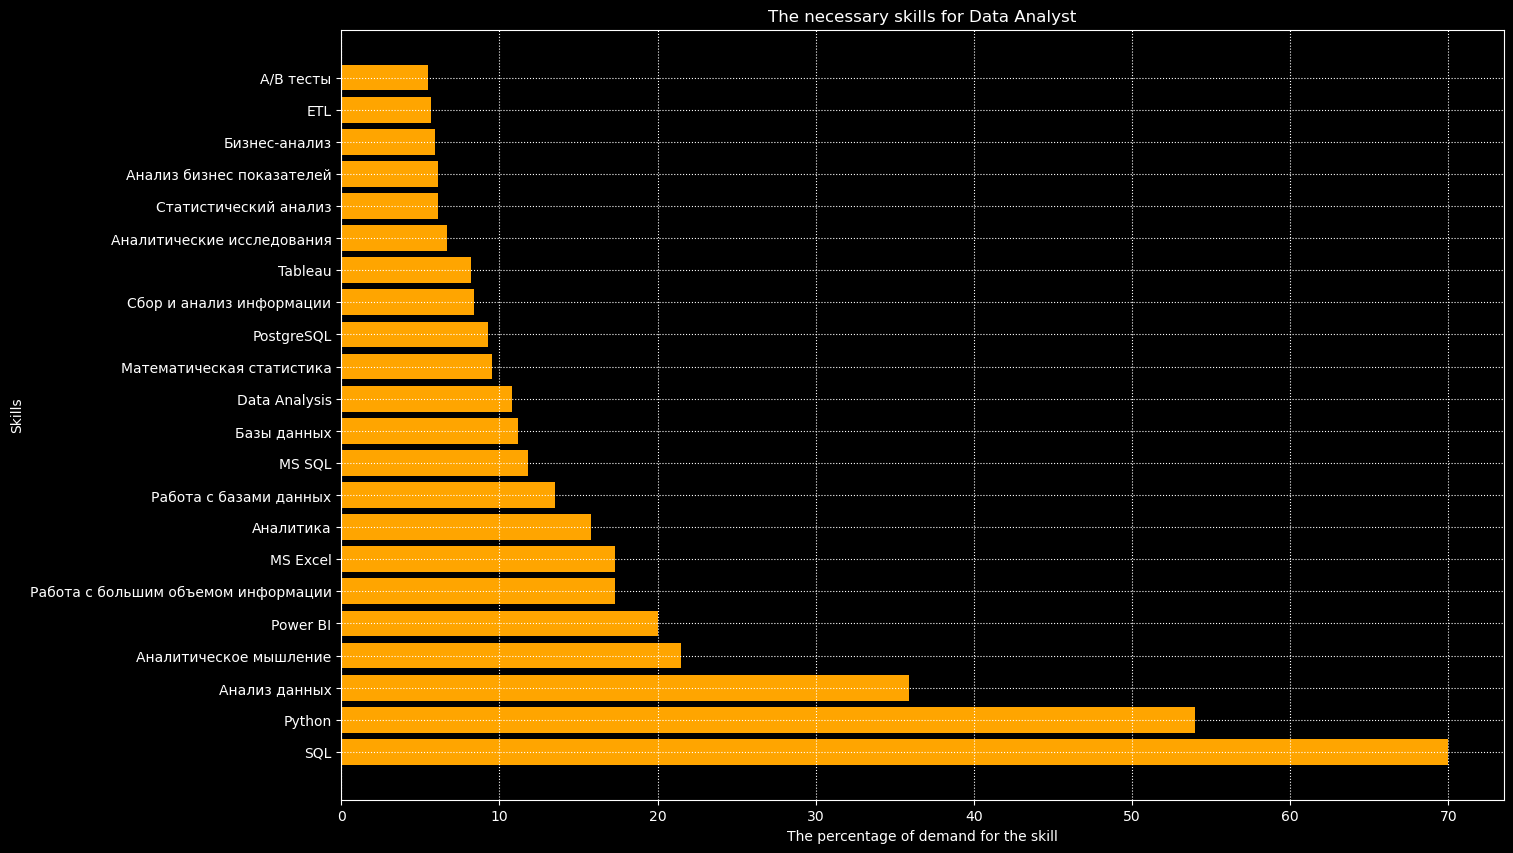

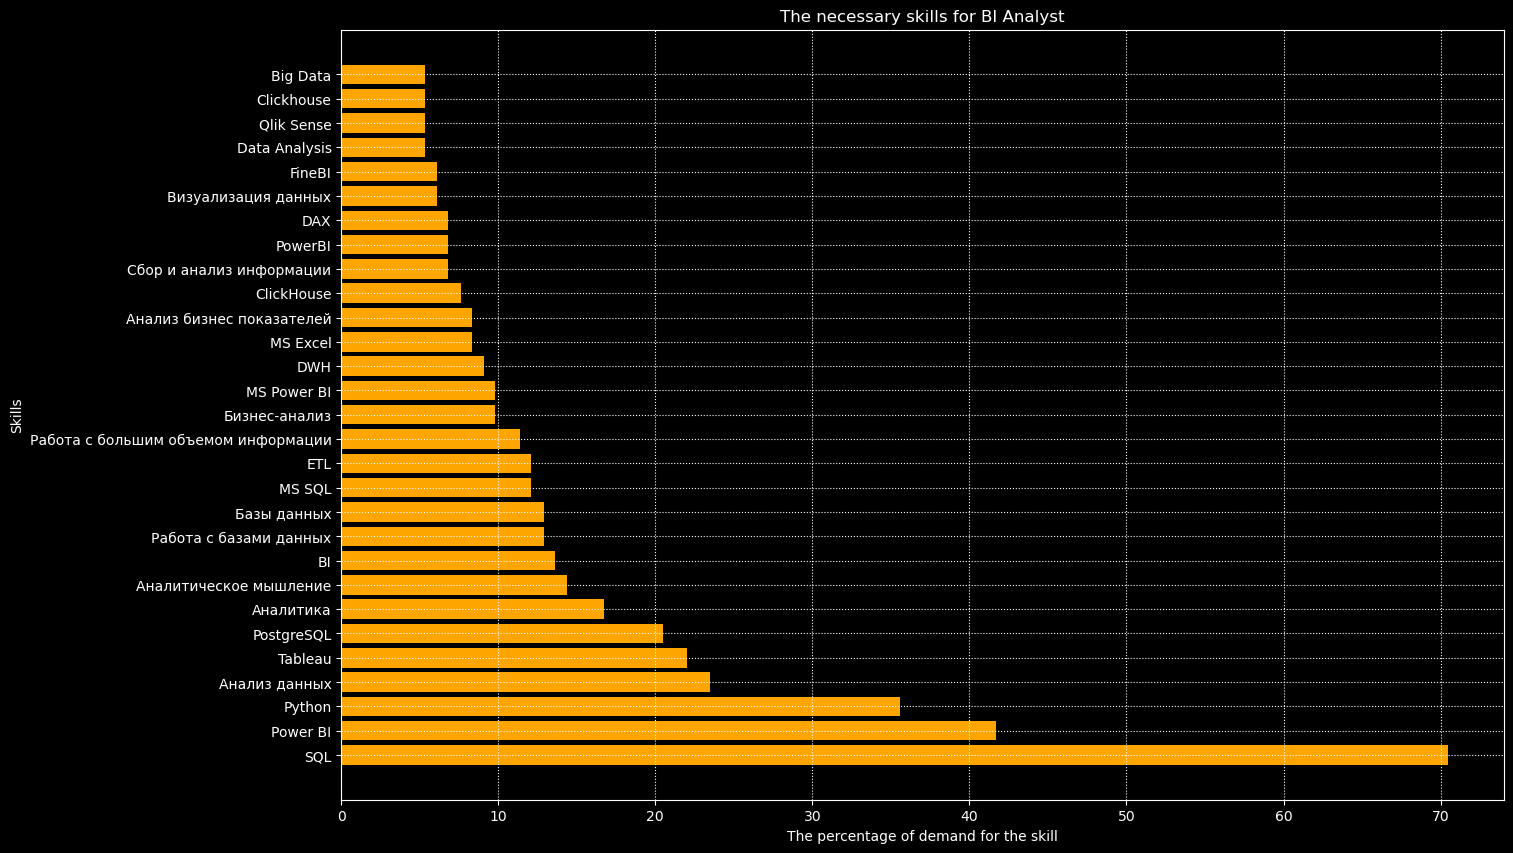

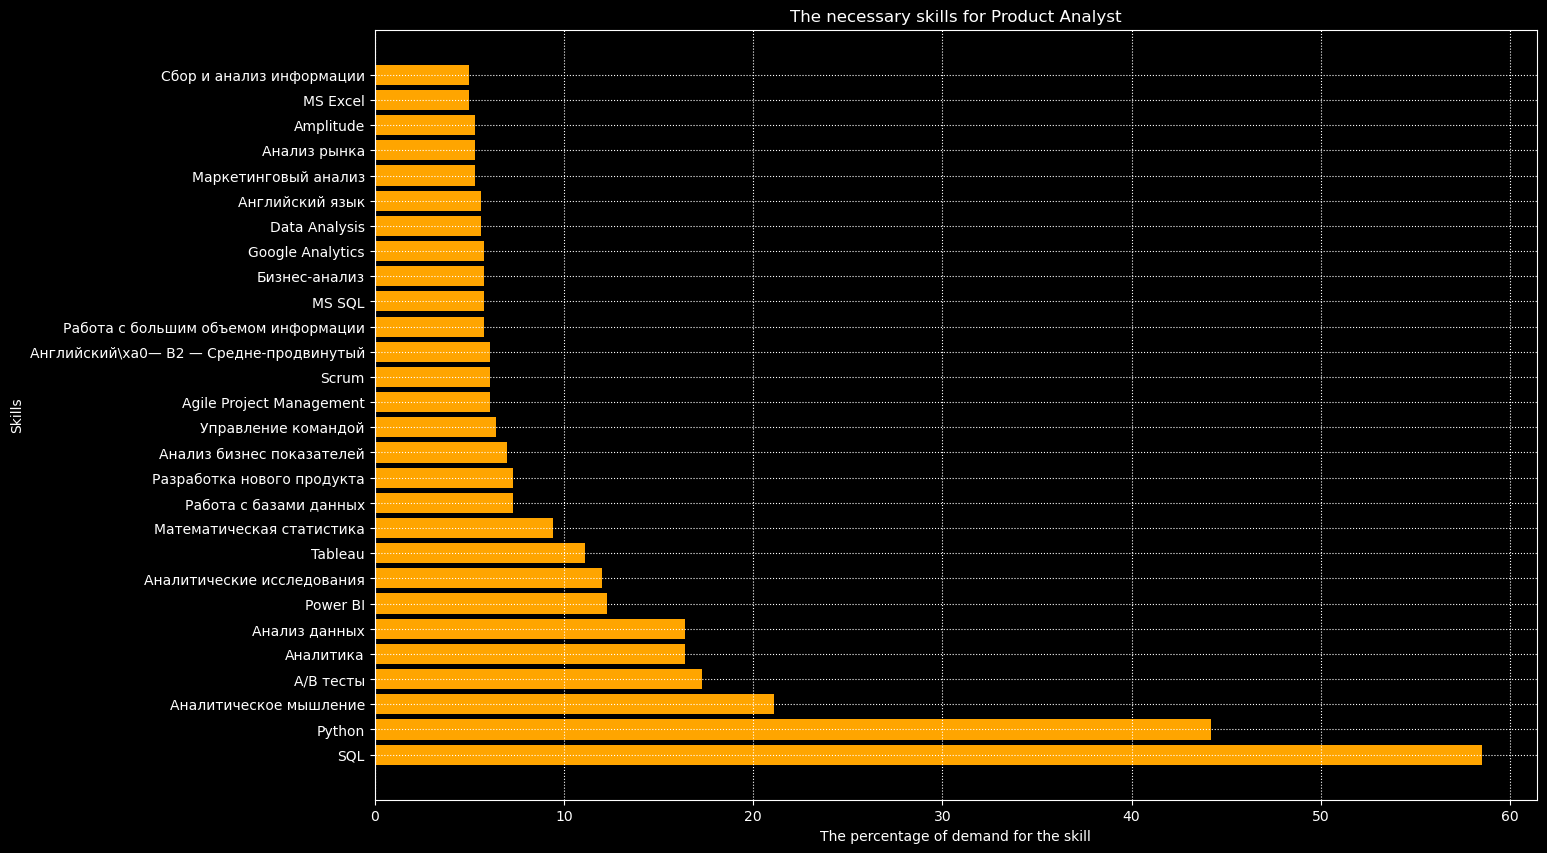

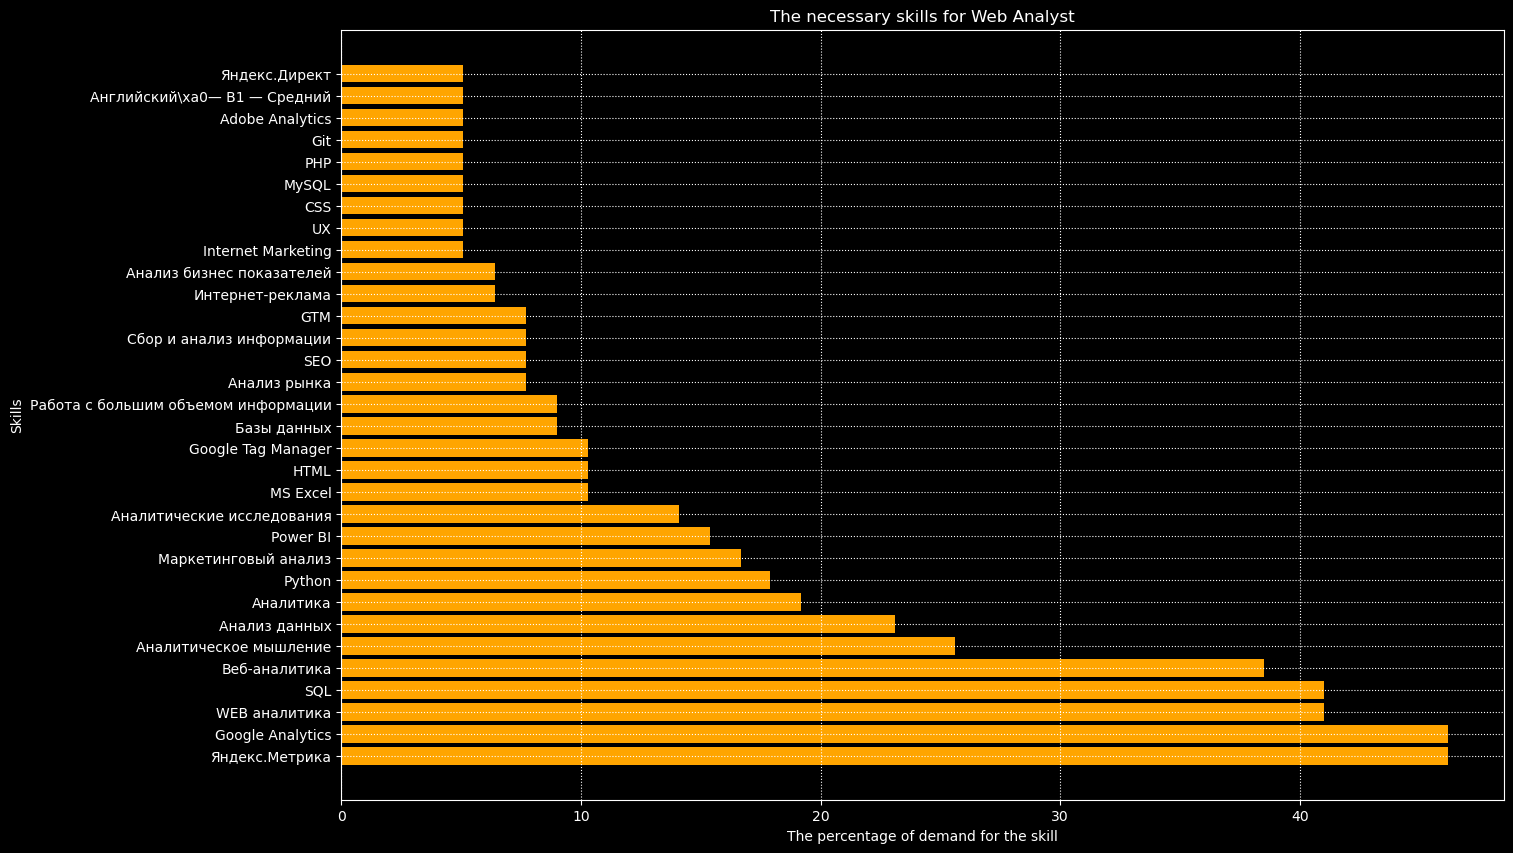

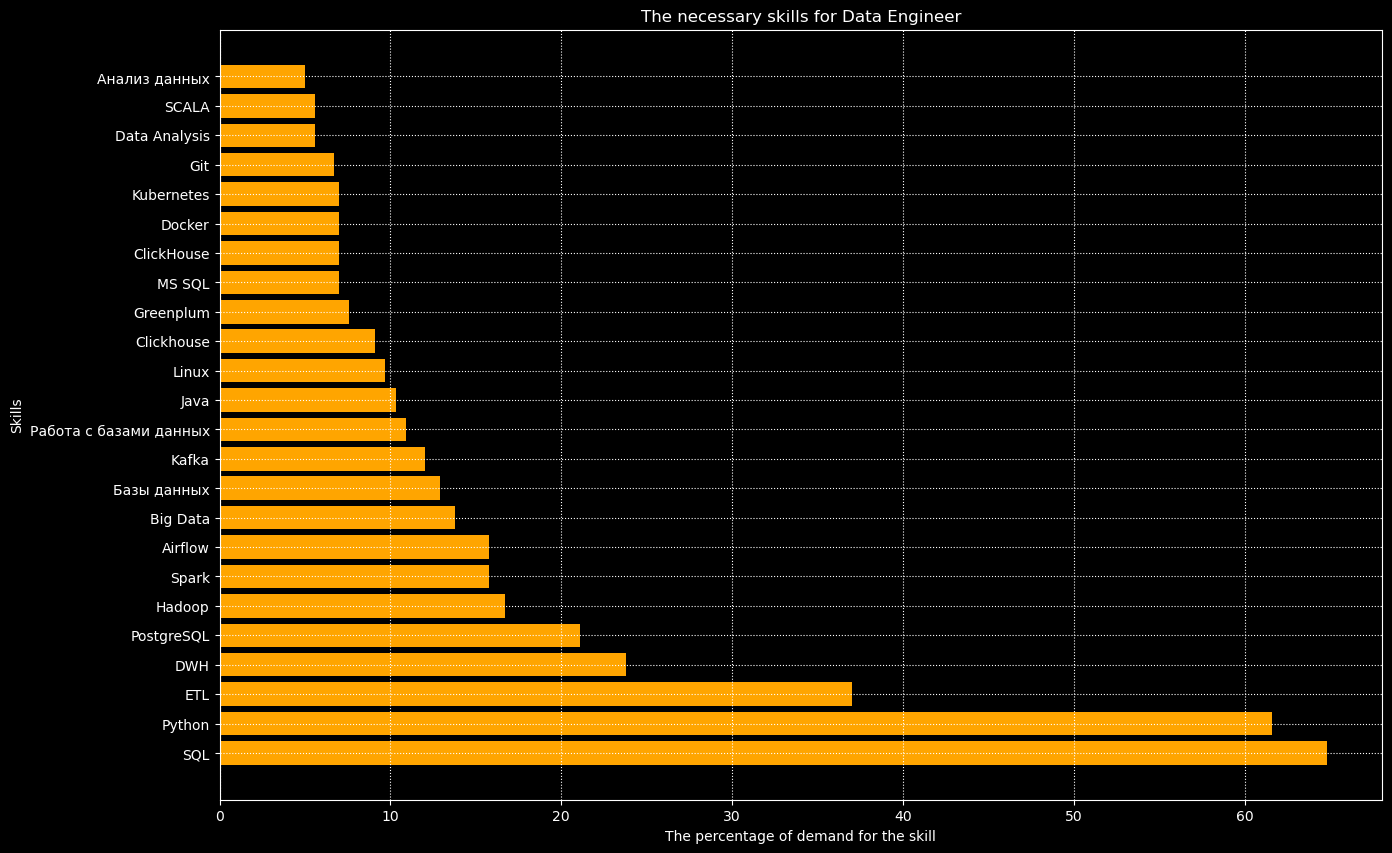

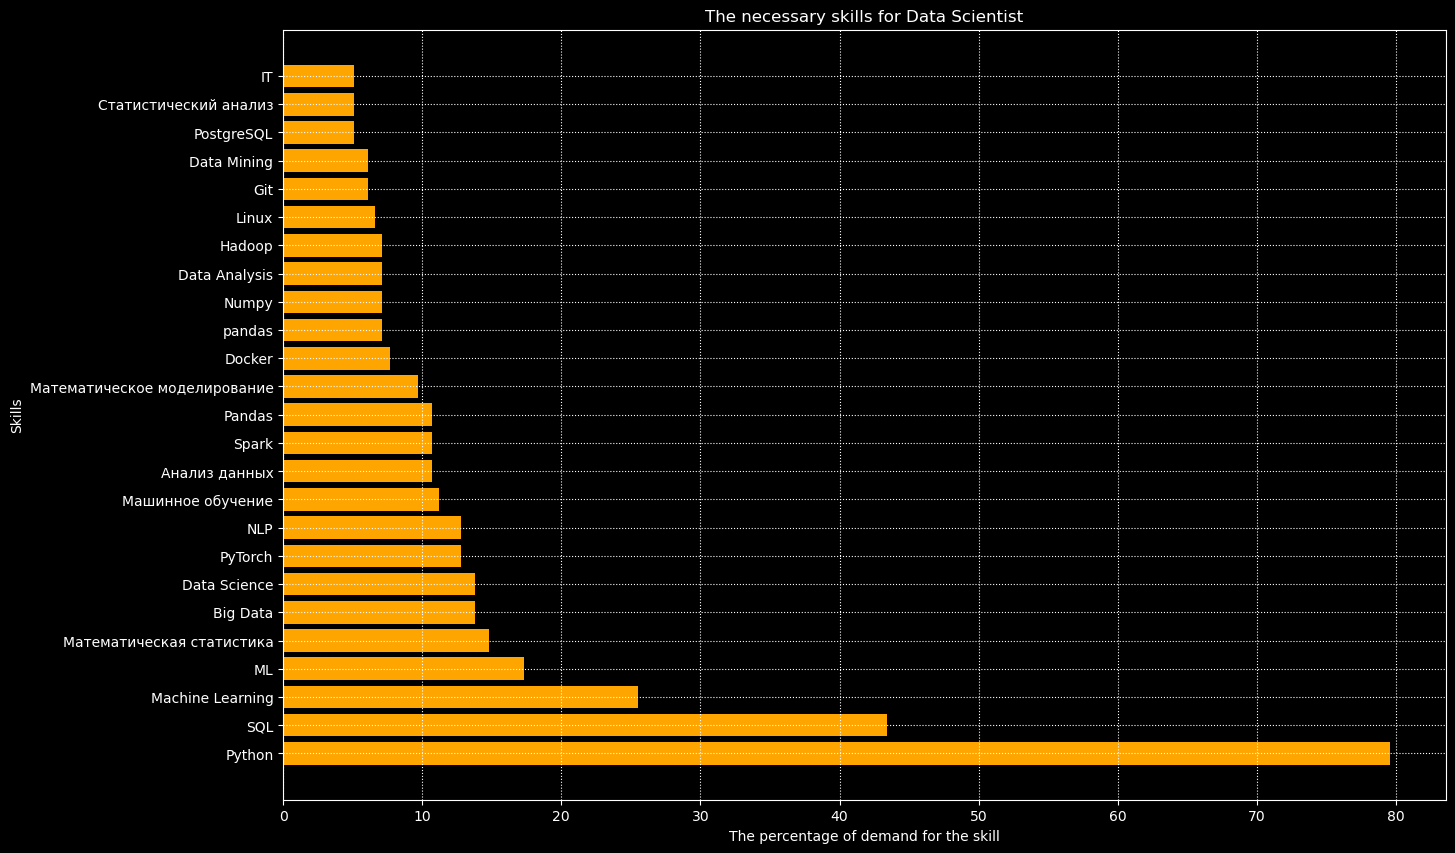

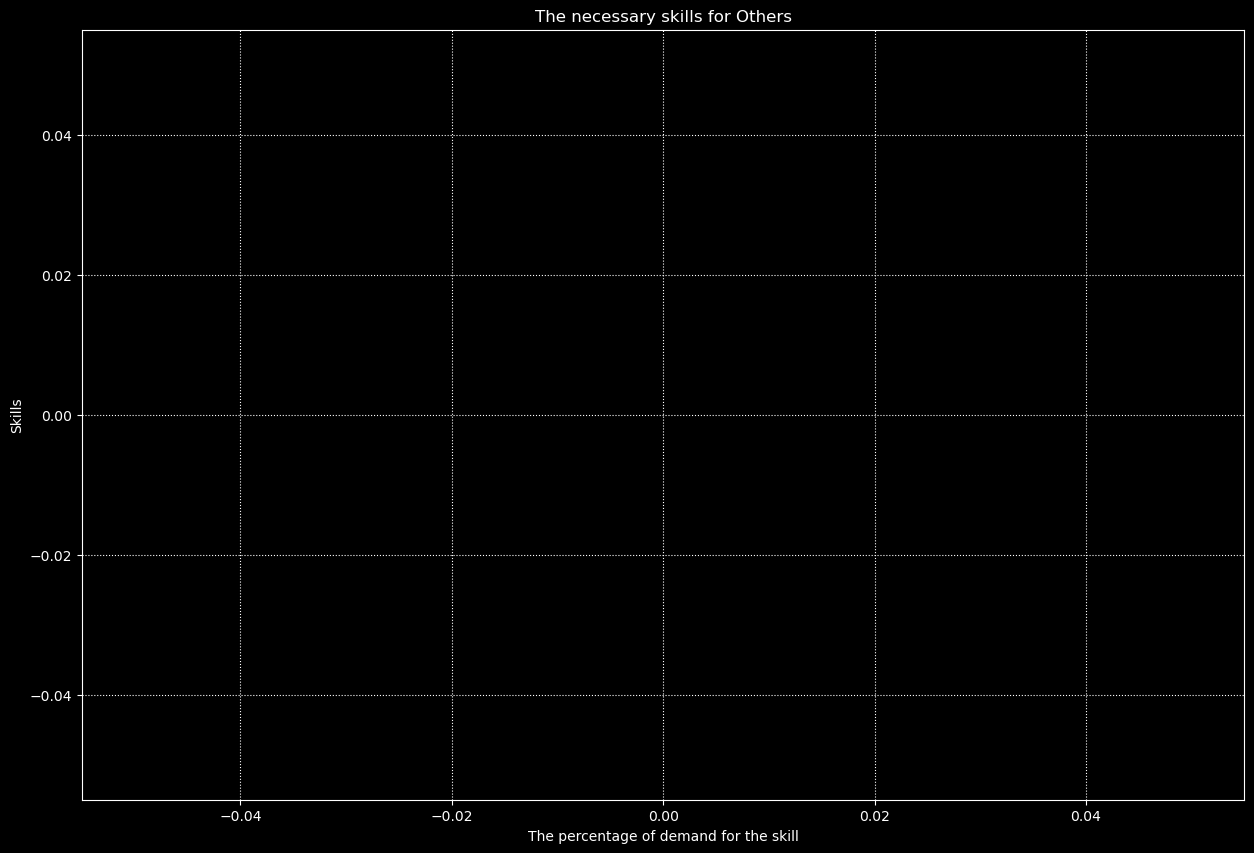

In [14]:
specializations = ['Data Analyst', 'BI Analyst', 'Product Analyst', 
                   'Web Analyst', 'Data Engineer', 'Data Scientist', 'Others']

plot_skills(df=result, specializations=specializations)

### Step 6. Implement up to 5 functions for query processing (up to 5 points).

Try to implement several useful functions for filtering the dataset (based on some combination of multiple features) and sorting the result (in ascending and/or descending order).
For example, if your dataset contains information about actors (like the main Final project), you can implement the function that takes names of actors and range of years as input  parameters and outputs a chronologically ordered list of common films for these actors, produced within a given period of time. 


Taking into account my skills, I am interested in vacancies for a Data Analyst, BI Analyst and Product Analyst with up to 3 years of experience.

Let's write an accumulating function **parse_interesting_dat()** that collects data on these vacancies over the past day and outputs them as a dataframe.

In [25]:
def parse_interesting_data(experience, vacancies):
    get_and_save_data(vacancies, experience, days_period=1)
    new_data = download_data()
    return new_data

Let's write a function **clear_data()** that converts our dataframe and returns the data in a purified form.

In [26]:
def clear_data(df):
    df['skills'] = df['skills'].apply(lambda x: str_to_list(x))
    df['pub_date'] = df['pub_date'].apply(lambda x: str_to_date(x))
    df['category'] = df['vacancy_name'].apply(categorize_vacancy)
    df = df[(df['category'] == 'Data Analyst') |
            (df['category'] == 'BI Analyst') |
            (df['category'] == 'Product Analyst')]
    return df

In [27]:
experience = ['noExperience', 'between1And3']
vacancies = [
            'BI Developer', 'Data Analyst', 'BI analyst', 
            'Product analyst', 'Продуктовый аналитик', 'Аналитик данных'
            ]

data = parse_interesting_data(experience, vacancies)

Getting vacancies with experience: noExperience
current page = 0


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:75: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 75 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(data)


Getting information about vacancies with experience: noExperience


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(


Vacancy № 0


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Vacancy № 10


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


The file noExperience_23-06-2024 was created

Getting vacancies with experience: between1And3
current page = 0


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:75: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 75 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(data)


Getting information about vacancies with experience: between1And3


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(


Vacancy № 0


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Vacancy № 10


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Vacancy № 20


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Vacancy № 30


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Vacancy № 40


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Vacancy № 50


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Vacancy № 60


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Vacancy № 70


c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:209: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py:152: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 152 of the file c:\Users\y2966\1.HSE\HSE_data_scraping\DS_Final_project_alternative\ver_3\vacancy_func.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


The file between1And3_23-06-2024 was created



In [28]:
data = clear_data(data)

Let's write a function **sort_data()** that sorts our dataframe by experience and company rating.

In [29]:
def sort_data(df):
    return df.sort_values(by=['experience', 'rating'], ascending=False)

In [30]:
data = sort_data(data)
data.head(5)

,id,vacancy_name,experience,work_type,busyness,city,company,rating,skills,pub_date,url,category
5,101879584,Аналитик данных (направление: продажи и маркет...,не требуется,Полная занятость,удаленная работа,Москва,ДИВАН.РУ,"4,5",None,2024-06-22,https://hh.ru/vacancy/101879584,Data Analyst
1,98613515,Аналитик данных,не требуется,Полная занятость,полный день,Челябинск,"АО Метран, Промышленная группа","4,4","[MS Power BI, MS Excel, MS PowerPoint, ERP, Ан...",2024-06-22,https://hh.ru/vacancy/98613515,Data Analyst
3,101833997,Аналитик данных (junior),не требуется,Полная занятость,полный день,Москва,Gridnine Systems,"3,7","[MS SQL, SQL, Работа с большим объемом информа...",2024-06-22,https://hh.ru/vacancy/101833997,Data Analyst
4,101651867,Junior Data Analyst (работа в офисе),не требуется,Полная занятость,полный день,Москва,ООО Between Exchange,"3,2","[Анализ данных, Аналитика, Работа с базами дан...",2024-06-22,https://hh.ru/vacancy/101651867,Data Analyst
0,97216825,Продуктовый аналитик,не требуется,Полная занятость,полный день,Москва,"«Почта России», Офис","3,1","[MS Excel, Анализ данных, Анализ бизнес показа...",2024-06-22,https://hh.ru/vacancy/97216825,Product Analyst


Let's write a function **filter_vacancies():** that searches for vacancies with the required skills.

In [31]:
def filter_vacancies(df, skills_list):
    filtered_vacancies = []
    
    for _, row in df.iterrows():
        if row['skills'] and all(skill in row['skills'] for skill in skills_list):
            filtered_vacancies.append(row)
    
    if not filtered_vacancies:
        return pd.DataFrame()
    
    return pd.DataFrame(filtered_vacancies)

Let's check how the function works with the skills **'Python'** and **'SQL'**.

In [32]:
skills_to_find = ['Python', 'SQL']

filtered_df = filter_vacancies(data, skills_to_find)
filtered_df.head(50)

,id,vacancy_name,experience,work_type,busyness,city,company,rating,skills,pub_date,url,category
5,101826996,Аналитик данных / Data Analyst / BI-аналитик,3–6 лет,Полная занятость,удаленная работа,Москва,Фрифлекс,"5,0","[A/B тесты, Product Development, Unit-экономик...",2024-06-22,https://hh.ru/vacancy/101826996,Data Analyst
16,102311200,Продуктовый аналитик senior,3–6 лет,Полная занятость,удаленная работа,Москва,Amex Development,"5,0","[SQL, Python, A/B тесты]",2024-06-22,https://hh.ru/vacancy/102311200,Product Analyst
15,101830099,Продуктовый аналитик / Product analyst (b2c),3–6 лет,Полная занятость,полный день,Санкт-Петербург,FS Play,"4,3","[SQL, Python, Clickhouse, ETL, Data Analysis, ...",2024-06-22,https://hh.ru/vacancy/101830099,Product Analyst
21,99959061,"Аналитик данных, Ozon Fintech",3–6 лет,Полная занятость,полный день,Санкт-Петербург,Ozon Fintech,"3,7","[Data Science, Python, SQL, Математическая ста...",2024-06-22,https://hh.ru/vacancy/99959061,Data Analyst
12,102296207,Data Scientist/Analyst,3–6 лет,Полная занятость,удаленная работа,Москва,RapidSeedbox ltd,NaN,"[Google Analytics, Data Analysis, Python, SQL]",2024-06-22,https://hh.ru/vacancy/102296207,Data Analyst
22,102480300,Игровой аналитик (продуктовый аналитик),1–3 года,Полная занятость,удаленная работа,Петрозаводск,Zebomba Games,"4,8","[Python, SQL, Английский язык, Анализ данных, ...",2024-06-22,https://hh.ru/vacancy/102480300,Product Analyst
5,92276478,Старший аналитик данных/Senior Data Analyst,1–3 года,Полная занятость,удаленная работа,Москва,Онлайн-школа Тетрика,"4,6","[PostgreSQL, Airflow, Metabase, Clickhouse, De...",2024-06-22,https://hh.ru/vacancy/92276478,Data Analyst
1,102057463,Аналитик данных,1–3 года,Полная занятость,полный день,Тольятти,АО НПФ Ростех,NaN,"[SQL, MS PowerPoint, Аналитическое мышление, P...",2024-06-23,https://hh.ru/vacancy/102057463,Data Analyst
8,92467882,Продуктовый аналитик,1–3 года,Полная занятость,полный день,Калининград,ООО Тренд Лайн,NaN,"[SQL, Python, Аналитическое мышление, Аналитик...",2024-06-22,https://hh.ru/vacancy/92467882,Product Analyst
9,100630612,Data-аналитик,1–3 года,Полная занятость,удаленная работа,Екатеринбург,ООО Фин Промоут Системс,NaN,"[SQL, ETL, Python, MongoDB, Tableau, Power BI,...",2024-06-22,https://hh.ru/vacancy/100630612,Data Analyst


## Conclusions

The analysis of the job market in the field of data science was conducted using web scraping of the hh.ru website. 
A total of **4264 job vacancies** were analyzed.

The distribution of vacancies among junior, middle, and senior positions is as follows:
- **9%** for juniors; 
- **40%** for middles;
- **51%** for seniors.



In terms of the distribution of vacancies by cities, the top 5 cities with the highest number of vacancies are:
- **Moscow (64%)**;
- **Saint Petersburg (11%)**;
- **Yekaterinburg (2.4%)**;
- **Novosibirsk (2%)**;
- **Kazan (1.7%)**.

Regarding the distribution by specializations in the field of data science, the vacancies were divided into:
- **analytics (64%)** (Data analyst, Product analyst, BI analyst and Web analyst);
- **data engineering (22%)**;
- **data science (14%)**.

The top skills required for all specializations are **Python** and **SQL**.

As a result of the study, the distribution of job formats in vacancies in the field of data science was **75% for full-time office work** and **25% for remote work**.

As new data becomes available, the analysis can be expanded to include more job vacancies.

Furthermore, a project has been developed to collect daily data from the hh.ru website to facilitate job search in the field of data science. 

This project can be used for searching a job to speed up the process of finding suitable vacancies.